In [ ]:
%matplotlib inline
import pandas as pd

In [ ]:
compras_df = pd.read_csv('/work/compras_df_enriched.csv')

## Probar un Modelo Supervisado

In [ ]:
data = compras_df.copy()
for i, column in enumerate(list([str(d) for d in data.dtypes])):
    if column == "object":
        data[data.columns[i]] = data[data.columns[i]].fillna(data[data.columns[i]].mode())
        data[data.columns[i]] = data[data.columns[i]].astype("category").cat.codes
    else:
        data[data.columns[i]] = data[data.columns[i]].fillna(data[data.columns[i]].median())


In [ ]:
data.head(5)

,CVE BEN,BENEFICIARIO,RFC,FACTURAS,CONTRATO,CONCEPTO,TIPO,FDO-#OP,FECHA,IMPORTE,SHEET,DIA,MES,ANO,BENEFICIARIO_SALES,IMPORTE_GASTOS_PROMEDIO,HAS_LINKEDIN_SITE
0,110150,102,108,879,133,1354,1,1022838.0,12,885080.00,1,17,6,2022,1,583159.370513,0
1,110741,11,27,1413,38,1340,1,1022770.0,7,52854.24,1,10,6,2022,5,583159.370513,0
2,110741,11,27,1412,51,1342,1,1022770.0,7,28596.32,1,10,6,2022,5,583159.370513,0
3,110741,11,27,1409,8,1345,1,1022770.0,7,3781.60,1,10,6,2022,5,583159.370513,0
4,110741,11,27,1411,39,1416,1,1022815.0,12,2872.10,1,17,6,2022,5,583159.370513,0


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [ ]:
y = data.pop('IMPORTE')
X = data.copy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
clf = RandomForestRegressor(n_estimators=1000, max_depth=4)

In [ ]:
clf.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, n_estimators=1000)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test, clf.predict(X_test))

0.3474717163892854

## Probar un Modelo No Supervisado o de Clustering para Texto

In [ ]:
import gensim
import nltk
from nltk.corpus import stopwords
import numpy as np
np.random.seed(2021)

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def preprocess(text):
    result = []
    for token in text.split():
        if token not in stopwords.words('spanish') and len(token)>4:
            result.append(token)
    return result

In [ ]:
process_business = [preprocess(x) for x in list(compras_df['BENEFICIARIO'].unique())]

In [ ]:
process_business

[['COMPUMARK,'],
 ['ALMACEN', 'PAPELERO', 'SALDAÑA,'],
 ['PLOMIFERRETERA', 'TORNILLO,'],
 ['MISODI', 'PUBLICIDAD,S.A.DE'],
 ['IMPULSORA', 'RENTAS', 'SERVICIOS,'],
 ['AMERICANA,S.A.DE'],
 ['GONZALEZ', 'GARZA'],
 ['AUTOKAM', 'REGIOMONTANA,S.A.DE'],
 ['CLIMEEZ', 'NORTE,S.A.DE'],
 ['INTER', 'ENTER', 'COMPUTADORAS,'],
 ['REGIA', 'SOLUCION,'],
 ['DESARROLLOS', 'CONSTRUCTIVOS', 'NACIONALES,S.A.DE'],
 ['BIOANALISIS', 'SERVICIOS', 'HEMATOLOGICOS'],
 ['HOSPITAL', 'FELIPE', 'JESUS'],
 ['COLEGIO', 'VALUADORES', 'NUEVO', 'LEON,'],
 ['FARMACEUTICA,'],
 ['MONTERREY,'],
 ['BUSINESS', 'ELITE', 'NETWORK,'],
 ['LOPEZ', 'MARTINEZ', 'JULIAN'],
 ['BANCA', 'AFIRME,'],
 ['RODRIGUEZ', 'VALDES', 'RAYMUNDO'],
 ['SEGUROS', 'BANORTE,', 'GRUPO', 'FINANCIERO', 'BANORTE'],
 ['SERVICIOS', 'PURIFICACION', 'MAQUILA,'],
 ['INTERLAMPARAS,'],
 ['EPSILON', 'ENTERTAINMENT,'],
 ['AUDIO', 'CONTROL', 'INDUSTRIAL,'],
 ['GRUPO', 'ROSH,'],
 ['MEDICAL,'],
 ['SMART', 'NETWORKS,'],
 ['SERVICIOS', 'EMPRESARIALES', 'CEMARU,'],
 ['GRUPO

In [ ]:
dictionary = gensim.corpora.Dictionary(process_business)

In [ ]:
dictionary.filter_extremes(no_below=1, no_above=0.5)

In [ ]:
bow_corpus = [dictionary.doc2bow(doc) for doc in process_business]

In [ ]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=6, id2word=dictionary, passes=10, workers=2)

In [ ]:
for idx, type_business in lda_model.print_topics(-1):
    print('Topic:{} Words:{}'.format(idx, type_business))

Topic:0 Words:0.027*"HERNANDEZ" + 0.021*"ANTONIO" + 0.020*"GARZA" + 0.016*"ANDRES" + 0.016*"RODRIGUEZ" + 0.013*"EDUARDO" + 0.012*"GARCIA" + 0.012*"JESUS" + 0.012*"MEXICO," + 0.011*"GONZALEZ"
Topic:1 Words:0.030*"RODRIGUEZ" + 0.017*"MARIA" + 0.011*"JIMENEZ" + 0.011*"GONZALEZ" + 0.011*"HERNANDEZ" + 0.009*"ALVARADO" + 0.009*"MEXICO," + 0.009*"MORENO" + 0.009*"CLAUDIA" + 0.006*"JESUS"
Topic:2 Words:0.028*"MARTINEZ" + 0.019*"CONSTRUCCIONES" + 0.015*"LOPEZ" + 0.014*"PEREZ" + 0.012*"ANTONIO" + 0.012*"JESUS" + 0.012*"MARIA" + 0.012*"MONTERREY," + 0.010*"RODRIGUEZ" + 0.010*"ALEJANDRA"
Topic:3 Words:0.024*"GRUPO" + 0.024*"SERVICIOS" + 0.013*"TREVIÑO" + 0.008*"MORALES" + 0.008*"ROJAS" + 0.008*"DESARROLLO" + 0.008*"MARTINEZ" + 0.006*"RANGEL" + 0.006*"LORENA" + 0.006*"GERARDO"
Topic:4 Words:0.017*"GARZA" + 0.017*"ALEJANDRO" + 0.012*"RAMIREZ" + 0.012*"GRUPO" + 0.012*"ACEVEDO" + 0.012*"AGUILERA" + 0.012*"CONSTRUCTORA" + 0.010*"TORRES" + 0.010*"GARCIA" + 0.010*"CONSTRUCCIONES,"
Topic:5 Words:0.039*"GO

In [ ]:
def get_max_topic(index):
    results = lda_model[bow_corpus[index]]
    return max(lda_model[results], key=lambda x: x[1])[0]

In [ ]:
business_cluster = {x: get_max_topic(i) for i, x in enumerate(list(compras_df['BENEFICIARIO'].unique()))}

In [ ]:
business_cluster

{'COMPUMARK, S.A. DE C.V.': 5,
 'ALMACEN PAPELERO SALDAÑA, S.A. DE C.V.': 0,
 'PLOMIFERRETERA EL TORNILLO, S.A. DE C.V.': 3,
 'MISODI PUBLICIDAD,S.A.DE C.V.': 3,
 'IMPULSORA DE RENTAS Y SERVICIOS, S.A. DE C.V.': 5,
 'CAR ONE AMERICANA,S.A.DE C.V.': 3,
 'GONZALEZ GARZA ROSA LILA': 3,
 'AUTOKAM REGIOMONTANA,S.A.DE C.V.': 5,
 'CLIMEEZ DEL NORTE,S.A.DE C.V.': 0,
 'INTER @ ENTER COMPUTADORAS, S.A. DE C.V.': 0,
 'REGIA SOLUCION, S.A. DE C.V.': 5,
 'DESARROLLOS CONSTRUCTIVOS NACIONALES,S.A.DE C.V.': 0,
 'BIOANALISIS Y SERVICIOS HEMATOLOGICOS , S.A. DE C.V.': 5,
 'HOSPITAL SAN FELIPE DE JESUS S.C.': 5,
 'COLEGIO DE VALUADORES DE NUEVO LEON, A.C.': 5,
 'HISA FARMACEUTICA, S.A. DE C.V.': 5,
 'CAR ONE MONTERREY, S.A. DE C.V.': 5,
 'BUSINESS ELITE NETWORK, S.A. DE C.V.': 5,
 'LOPEZ MARTINEZ JULIAN': 5,
 'BANCA AFIRME, S.A.': 0,
 'RODRIGUEZ VALDES RAYMUNDO': 5,
 'SEGUROS BANORTE, S.A. DE C.V. GRUPO FINANCIERO BANORTE': 0,
 'SERVICIOS DE PURIFICACION Y MAQUILA, S.A. DE C.V.': 5,
 'INTERLAMPARAS, S.A

In [ ]:
compras_df['CLUSTER_NAME'] = compras_df['BENEFICIARIO'].apply(lambda x: business_cluster[x])

In [ ]:
compras_df['CLUSTER_NAME'].value_counts()

5    918
0    429
3    217
Name: CLUSTER_NAME, dtype: int64

<AxesSubplot:xlabel='CLUSTER_NAME'>

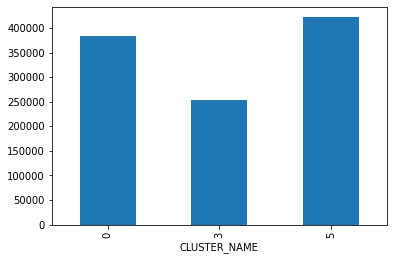

In [ ]:
compras_df.groupby('CLUSTER_NAME')['IMPORTE'].mean().plot.bar()

## Probar un Modelo No Supervisado de Anomalías en importes

In [ ]:
import numpy as np
from scipy.stats import norm

In [ ]:
params = norm.fit(compras_df['IMPORTE'])
params

(387731.5618286445, 1887299.1646918366)

In [ ]:
compras_df['PROB_TOTAL'] = [norm(params[0], params[1]).cdf(x) for x in compras_df['IMPORTE']]

In [ ]:
compras_df[compras_df['PROB_TOTAL']>0.95]

,CVE BEN,BENEFICIARIO,RFC,FACTURAS,CONTRATO,CONCEPTO,TIPO,FDO-#OP,FECHA,IMPORTE,SHEET,DIA,MES,ANO,BENEFICIARIO_SALES,IMPORTE_GASTOS_PROMEDIO,HAS_LINKEDIN_SITE,CLUSTER_NAME,PROB_TOTAL
14,112290,"IMPULSORA DE RENTAS Y SERVICIOS, S.A. DE C.V.",IRS940928BK7,A5397-183011-2151,SSP-294-2022,"PLANEACION Y COORDINACION DEL EVENTO ""AHORA NO...",TR,1022794.0,2022-06-10,7308000.00,GASTOS VARIOS,10,6,2022,1,583159.370513,"{'Rosa Lorena Valdez Miranda': True, 'Roque Ya...",5,0.999877
59,115789,"HISA FARMACEUTICA, S.A. DE C.V.",CHI990710I32,M106161-183011-1917,SFA-039-2022,CONSUMO DE MEDICAMENTOS DEL 1 AL 8 DE ABRIL 20...,TR,1022704.0,2022-06-03,4220621.01,GASTOS VARIOS,3,6,2022,40,583159.370513,"{'Rosa Lorena Valdez Miranda': True, 'Roque Ya...",5,0.978867
69,115789,"HISA FARMACEUTICA, S.A. DE C.V.",CHI990710I32,M106526-183011-1921,SFA-039-2022,CONSUMO DE MEDICAMENTOS DEL 18 AL 22 DE ABRIL ...,TR,1022704.0,2022-06-03,3596997.84,GASTOS VARIOS,3,6,2022,40,583159.370513,"{'Rosa Lorena Valdez Miranda': True, 'Roque Ya...",5,0.955477
131,116381,"EPSILON ENTERTAINMENT, S.A. DE C.V.",EEN140122A99,EEN239-183011-2152,SSP-298-2022,"PLANEACION Y COORDINACION DEL EVENTO ""AHORA NO...",TR,1022780.0,2022-06-10,8660281.48,GASTOS VARIOS,10,6,2022,1,583159.370513,"{'Rosa Lorena Valdez Miranda': True, 'Roque Ya...",5,0.999994
166,116684,"INDUSTRIAS SOLA BASIC, S.A. DE C.V.",ISB840628IB2,GS147003-183011-2244,SSP-189-2017,MANTENIMIENTO PREVENTIVO Y CORRECTIVO DE LOS T...,TR,604000081.0,2022-06-22,9000000.00,GASTOS VARIOS,22,6,2022,4,583159.370513,"{'Rosa Lorena Valdez Miranda': True, 'Roque Ya...",0,0.999997
167,116684,"INDUSTRIAS SOLA BASIC, S.A. DE C.V.",ISB840628IB2,GS147005-183011-2246,SSP-189-2017,MANTENIMIENTO PREVENTIVO Y CORRECTIVO DE LOS T...,TR,604000081.0,2022-06-22,3854000.00,GASTOS VARIOS,22,6,2022,4,583159.370513,"{'Rosa Lorena Valdez Miranda': True, 'Roque Ya...",0,0.966868
168,116684,"INDUSTRIAS SOLA BASIC, S.A. DE C.V.",ISB840628IB2,GS149020-183011-2763,NO APLICA,MANTENIMIENTO PREVENTIVO Y CORRECTIVO DE LOS T...,TR,604000082.0,2022-06-30,9000000.00,GASTOS VARIOS,30,6,2022,4,583159.370513,"{'Rosa Lorena Valdez Miranda': True, 'Roque Ya...",0,0.999997
169,116684,"INDUSTRIAS SOLA BASIC, S.A. DE C.V.",ISB840628IB2,GS149021-183011-2762,NO APLICA,MANTENIMIENTO PREVENTIVO Y CORRECTIVO DE LOS T...,TR,604000082.0,2022-06-30,3854000.00,GASTOS VARIOS,30,6,2022,4,583159.370513,"{'Rosa Lorena Valdez Miranda': True, 'Roque Ya...",0,0.966868
180,126224,"BANCO MULTIVA, SA. G.F.M.",BMI061005NY5,FS-11-2022-183010-1656,NO APLICA,FONDO SAPS QUINCENA 11-2022,TR,1022798.0,2022-06-14,7343658.40,GASTOS VARIOS,14,6,2022,2,583159.370513,"{'Rosa Lorena Valdez Miranda': True, 'Roque Ya...",5,0.999886
181,126224,"BANCO MULTIVA, SA. G.F.M.",BMI061005NY5,FS-12-2022-183010-1814,NO APLICA,FONDO SAPS QUINCENA 12-2022,TR,1022928.0,2022-06-29,7312801.19,GASTOS VARIOS,29,6,2022,2,583159.370513,"{'Rosa Lorena Valdez Miranda': True, 'Roque Ya...",5,0.999878


In [ ]:
models_sheet = {}
for sheet in list(compras_df['SHEET'].unique()):
    sheet_compras = compras_df[compras_df['SHEET'] == sheet]
    params = norm.fit(sheet_compras['IMPORTE'])
    models_sheet[sheet] = norm(params[0], params[1])

In [ ]:
sheet_prob = []
for i, row in compras_df.iterrows():
    sheet_prob.append(models_sheet[row['SHEET']].cdf(row['IMPORTE']))
compras_df['PROB_SHEET'] = sheet_prob

In [ ]:
compras_df[compras_df['PROB_SHEET']>0.95]

,CVE BEN,BENEFICIARIO,RFC,FACTURAS,CONTRATO,CONCEPTO,TIPO,FDO-#OP,FECHA,IMPORTE,SHEET,DIA,MES,ANO,BENEFICIARIO_SALES,IMPORTE_GASTOS_PROMEDIO,HAS_LINKEDIN_SITE,CLUSTER_NAME,PROB_TOTAL,PROB_SHEET
14,112290,"IMPULSORA DE RENTAS Y SERVICIOS, S.A. DE C.V.",IRS940928BK7,A5397-183011-2151,SSP-294-2022,"PLANEACION Y COORDINACION DEL EVENTO ""AHORA NO...",TR,1022794.0,2022-06-10,7308000.00,GASTOS VARIOS,10,6,2022,1,583159.370513,"{'Rosa Lorena Valdez Miranda': True, 'Roque Ya...",5,0.999877,0.996236
131,116381,"EPSILON ENTERTAINMENT, S.A. DE C.V.",EEN140122A99,EEN239-183011-2152,SSP-298-2022,"PLANEACION Y COORDINACION DEL EVENTO ""AHORA NO...",TR,1022780.0,2022-06-10,8660281.48,GASTOS VARIOS,10,6,2022,1,583159.370513,"{'Rosa Lorena Valdez Miranda': True, 'Roque Ya...",5,0.999994,0.999336
166,116684,"INDUSTRIAS SOLA BASIC, S.A. DE C.V.",ISB840628IB2,GS147003-183011-2244,SSP-189-2017,MANTENIMIENTO PREVENTIVO Y CORRECTIVO DE LOS T...,TR,604000081.0,2022-06-22,9000000.00,GASTOS VARIOS,22,6,2022,4,583159.370513,"{'Rosa Lorena Valdez Miranda': True, 'Roque Ya...",0,0.999997,0.999589
168,116684,"INDUSTRIAS SOLA BASIC, S.A. DE C.V.",ISB840628IB2,GS149020-183011-2763,NO APLICA,MANTENIMIENTO PREVENTIVO Y CORRECTIVO DE LOS T...,TR,604000082.0,2022-06-30,9000000.00,GASTOS VARIOS,30,6,2022,4,583159.370513,"{'Rosa Lorena Valdez Miranda': True, 'Roque Ya...",0,0.999997,0.999589
180,126224,"BANCO MULTIVA, SA. G.F.M.",BMI061005NY5,FS-11-2022-183010-1656,NO APLICA,FONDO SAPS QUINCENA 11-2022,TR,1022798.0,2022-06-14,7343658.40,GASTOS VARIOS,14,6,2022,2,583159.370513,"{'Rosa Lorena Valdez Miranda': True, 'Roque Ya...",5,0.999886,0.996392
181,126224,"BANCO MULTIVA, SA. G.F.M.",BMI061005NY5,FS-12-2022-183010-1814,NO APLICA,FONDO SAPS QUINCENA 12-2022,TR,1022928.0,2022-06-29,7312801.19,GASTOS VARIOS,29,6,2022,2,583159.370513,"{'Rosa Lorena Valdez Miranda': True, 'Roque Ya...",5,0.999878,0.996257
184,126704,SERVICIO DE ADMINISTRACION TRIBUTARIA,SAT970701NN4,ISRS0522-183006-41,NO APLICA,PAGO DE IMPUESTOS POR SALARIOS Y ASIMILADOS DE...,TR,1022799.0,2022-06-15,13860525.00,GASTOS VARIOS,15,6,2022,2,583159.370513,"{'Rosa Lorena Valdez Miranda': True, 'Roque Ya...",0,1.000000,1.000000
197,206894,MUNICIPIO DE LA CIUDAD DE MONTERREY,MCM610101PT2,2022-11-A-183010-1672,NO APLICA,"PAGO DE NÓMINA PERIODO: 11-2022, BANCO: BANCA ...",TR,11000252.0,2022-06-23,32447591.98,GASTOS VARIOS,23,6,2022,14,583159.370513,"{'Rosa Lorena Valdez Miranda': True, 'Roque Ya...",5,1.000000,1.000000
199,206894,MUNICIPIO DE LA CIUDAD DE MONTERREY,MCM610101PT2,2022-11-B-183010-1674,NO APLICA,"PAGO DE NÓMINA PERIODO: 11-2022, BANCO: BANCO ...",TR,231000159.0,2022-06-23,18267383.32,GASTOS VARIOS,23,6,2022,14,583159.370513,"{'Rosa Lorena Valdez Miranda': True, 'Roque Ya...",5,1.000000,1.000000
200,206894,MUNICIPIO DE LA CIUDAD DE MONTERREY,MCM610101PT2,2022-11-BBVA-183010-1673,NO APLICA,"PAGO DE NÓMINA PERIODO: 11-2022, BANCO: BBVA B...",TR,328000022.0,2022-06-23,6155023.82,GASTOS VARIOS,23,6,2022,14,583159.370513,"{'Rosa Lorena Valdez Miranda': True, 'Roque Ya...",5,0.998878,0.986597


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6853f152-0228-4c63-98bd-f29aa5103223' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>